# Project-Driven Phase 1 EDA — IRS Nonprofit Organizations (Cleaned Sample)

## Project goal (what we are trying to answer)
Your stakeholders want to understand **what this data represents** and **what it can tell us at a high level**.

In Phase 1, we focus on **trust + clarity**:
1. **What is in the dataset?** (columns, units, scope)
2. **How reliable/complete is it?** (missingness, duplicates)
3. **What are the big-picture patterns?** (where, what types, and financial scale)

**Deliverable from Phase 1:** a short set of findings + a few headline tables you can turn into visuals in Tableau/Power BI.


## Dataset summary
Each row represents a nonprofit organization record from IRS data and includes:
- Identity/location (EIN, NAME, CITY, STATE, ZIP)
- IRS administrative/classification fields (SUBSECTION, STATUS, FOUNDATION, etc.)
- Sector classification (NTEE_CD)
- Financial fields when reported (REVENUE_AMT, ASSET_AMT, INCOME_AMT)

> Missing values are expected because not all organizations report every field.


In [5]:
# 0) Setup
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)


## 1) Load data (start of the project workflow)

### Why we do this
Before we analyze anything, we confirm we can load the dataset and see a preview.

### What to check in the preview
- Do the columns look correct?
- Do rows look like real organizations?
- Are CITY/STATE/ZIP present (for later mapping)?


In [9]:
DATA_PATH = "/mnt/data/dataset_cleaned_merged.csv"  # update if needed
df = pd.read_csv("/Users/ashishsharma/CSUEB/volunteer_mvp/data/clean/dataset_cleaned_merged.csv")

df.head()


,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,RULING,DEDUCTIBILITY,FOUNDATION,ACTIVITY,ORGANIZATION,STATUS,TAX_PERIOD,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,30547699,SOLID ROCK INTERNATIONAL OUTREACH MINISTRIES,% DR TED GABRIEL WATSON,5095 ROBINSON RD EXTENSION,JACKSON,MS,39204-0000,0,3,3,7000,200502,1,10,0,1,1,NaN,1,2,6,0,12,NaN,NaN,NaN,X21,NaN
1,46011913,CHARLTON CHARITY TRUST NO 4 100-6009248,% BANKBOSTON N A,PO BOX 653067,DALLAS,TX,75265-3067,0,3,3,1000,0,0,4,909000000,6,12,202409.0,6,4,0,1,9,2589489.0,171790.0,NaN,NaN,NaN
2,10867255,KINGDOM FIRST CHRISTIAN CENTER INC,% HORIS GREEN,PO BOX 20952,PORTLAND,OR,97294-0952,0,3,3,7000,200805,1,10,0,1,1,NaN,0,0,6,0,12,NaN,NaN,NaN,X20,NaN
3,50635007,SUNNY SANDS ELEMENTARY SCHOOL PTG,% PAMELA HORTON,69310 MCCALLUM WAY,CATHEDRAL CTY,CA,92234-2997,0,3,3,1000,201202,1,15,0,1,1,202506.0,0,0,2,0,6,0.0,0.0,0.0,B94,NaN
4,30396268,MARRIAGE BED INC,% PAUL & LORI BYERLY,4641 LYONS HILL RD,SPRINGDALE,WA,99173-9708,4228,3,9,7000,200310,0,10,0,1,1,202412.0,0,0,6,0,12,0.0,0.0,0.0,NaN,NaN


## 2) Confirm scope: How big is this dataset? What columns exist?

### Why stakeholders care
This sets expectations: “How much data are we working with?” and “What does each record represent?”

### Output you can copy into a stakeholder deck
- Number of records (rows)
- Number of fields (columns)
- A simple list of fields


In [10]:
print("Rows, Columns:", df.shape)

print("\nColumns:")
for c in df.columns:
    print("-", c)


Rows, Columns: (9999, 28)

Columns:
- EIN
- NAME
- ICO
- STREET
- CITY
- STATE
- ZIP
- GROUP
- SUBSECTION
- AFFILIATION
- CLASSIFICATION
- RULING
- DEDUCTIBILITY
- FOUNDATION
- ACTIVITY
- ORGANIZATION
- STATUS
- TAX_PERIOD
- ASSET_CD
- INCOME_CD
- FILING_REQ_CD
- PF_FILING_REQ_CD
- ACCT_PD
- ASSET_AMT
- INCOME_AMT
- REVENUE_AMT
- NTEE_CD
- SORT_NAME


## 3) Data types & non-null counts (is the dataset structurally healthy?)

### Why we do this
- Confirms numeric columns are actually numeric
- Helps decide which fields are categorical vs numeric
- Shows early signals of missingness

### How to interpret
- `object` = text/categorical
- `int64` / `float64` = numeric (float often means missing values exist)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EIN               9999 non-null   int64  
 1   NAME              9999 non-null   object 
 2   ICO               8540 non-null   object 
 3   STREET            9999 non-null   object 
 4   CITY              9999 non-null   object 
 5   STATE             9999 non-null   object 
 6   ZIP               9999 non-null   object 
 7   GROUP             9999 non-null   int64  
 8   SUBSECTION        9999 non-null   int64  
 9   AFFILIATION       9999 non-null   int64  
 10  CLASSIFICATION    9999 non-null   int64  
 11  RULING            9999 non-null   int64  
 12  DEDUCTIBILITY     9999 non-null   int64  
 13  FOUNDATION        9999 non-null   int64  
 14  ACTIVITY          9999 non-null   int64  
 15  ORGANIZATION      9999 non-null   int64  
 16  STATUS            9999 non-null   int64  


## 4) Data quality check: Are there duplicate rows?

### Why we do this
Duplicates can inflate counts and distort totals. Since your dataset was merged from 2 samples, we confirm duplicates are truly removed.

### Interpretation
- **0** duplicates = good
- **>0** duplicates = we should deduplicate before reporting counts


In [12]:
dup_rows = df.duplicated().sum()
dup_rows


np.int64(0)

## 5) Missing data profile (what coverage do we have?)

### Why stakeholders care
Stakeholders need to know which fields are well-populated vs partially reported—especially financial fields.

### What this table gives you
- Missing count per column
- Missing percentage per column

### How to use this later
- For charts: prefer columns with reasonable coverage
- For reporting: mention that totals are based on reported values only


In [13]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(1)

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

missing_summary


,missing_count,missing_pct
SORT_NAME,8084,80.8
REVENUE_AMT,3984,39.8
NTEE_CD,2478,24.8
INCOME_AMT,2423,24.2
ASSET_AMT,2423,24.2
TAX_PERIOD,2360,23.6
ICO,1459,14.6
ORGANIZATION,0,0.0
ACCT_PD,0,0.0
PF_FILING_REQ_CD,0,0.0


## 6) What does the dataset say about “where the opportunities are”? (high-level)

### Why this matters
A simple first story is geography:
- Which states have the most organizations?
- Which cities show up most often?

> This is NOT a map yet—just a fast summary that can become a map later.


In [14]:
# Top states by number of records
if "STATE" in df.columns:
    top_states = df["STATE"].value_counts(dropna=False).head(15)
    top_states
else:
    print("STATE column not found.")


In [15]:
# Top cities (can be messy because city names may repeat across states)
if "CITY" in df.columns:
    top_cities = df["CITY"].value_counts(dropna=False).head(15)
    top_cities
else:
    print("CITY column not found.")


## 7) What types of organizations are these? (sector & IRS classification)

### Why this matters
Stakeholders often ask:
- “What sectors do these organizations belong to?” (NTEE)
- “What legal type is most common?” (SUBSECTION / FOUNDATION)


In [16]:
def top_values(col, n=15):
    if col not in df.columns:
        print(f"Column not found: {col}")
        return None
    return df[col].value_counts(dropna=False).head(n)

top_values("NTEE_CD", 15)


NTEE_CD
NaN    2478
X20     886
X21     729
T22     216
P20     185
T20     181
B82     153
S41     150
D20     140
O50     100
N50      96
B11      95
B90      93
X99      91
A80      82
Name: count, dtype: int64

In [17]:
top_values("SUBSECTION", 15)


SUBSECTION
3     8550
92     444
6      253
4      233
7      176
5       80
19      75
8       71
13      35
10      19
9       18
12      15
15       9
91       7
2        7
Name: count, dtype: int64

In [18]:
top_values("FOUNDATION", 15)


FOUNDATION
15    3388
10    2188
16    1558
0     1444
4     1088
11     135
17     110
3       44
12      21
21       7
22       6
24       3
13       3
14       2
9        1
Name: count, dtype: int64

## 8) Financial scale: How big are these organizations? (Phase 1 summary)

### Why this matters
Financial fields are typically **skewed**:
- Many small orgs
- A few very large orgs

### What we do in Phase 1
- Show basic descriptive statistics
- Compare mean vs median (median is more “typical” under skew)


In [19]:
financial_cols = [c for c in ["REVENUE_AMT", "ASSET_AMT", "INCOME_AMT"] if c in df.columns]
financial_cols


['REVENUE_AMT', 'ASSET_AMT', 'INCOME_AMT']

In [20]:
if financial_cols:
    display(df[financial_cols].describe())
    print("\nMedians (more robust typical value):")
    display(df[financial_cols].median())
else:
    print("Expected financial columns not found.")


,REVENUE_AMT,ASSET_AMT,INCOME_AMT
count,6.015000e+03,7.576000e+03,7.576000e+03
mean,1.436960e+06,3.255789e+06,1.584637e+06
std,1.581255e+07,4.052628e+07,1.854881e+07
min,-6.943207e+06,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.941150e+04,2.251950e+04
75%,1.425575e+05,4.542895e+05,2.128420e+05
max,6.419982e+08,1.865492e+09,9.963917e+08



Medians (more robust typical value):


REVENUE_AMT        0.0
ASSET_AMT      19411.5
INCOME_AMT     22519.5
dtype: float64

## 9) Stakeholder-ready summaries (tables you can paste into slides)

### Goal
Create simple “Top 10” tables:
- Top states by total reported revenue
- Top sectors (NTEE) by median revenue (typical org size)

> Note: totals only include organizations that reported values (missing values are excluded by default).


In [21]:
# Top states by total reported revenue
if "STATE" in df.columns and "REVENUE_AMT" in df.columns:
    top_states_revenue = (
        df.groupby("STATE")["REVENUE_AMT"]
          .sum(min_count=1)
          .sort_values(ascending=False)
          .head(10)
    )
    top_states_revenue
else:
    print("STATE or REVENUE_AMT not found.")


In [22]:
# Top NTEE codes by median revenue (typical revenue by sector)
if "NTEE_CD" in df.columns and "REVENUE_AMT" in df.columns:
    top_ntee_median_rev = (
        df.groupby("NTEE_CD")["REVENUE_AMT"]
          .median()
          .sort_values(ascending=False)
          .head(10)
    )
    top_ntee_median_rev
else:
    print("NTEE_CD or REVENUE_AMT not found.")


**Phase 1 — Key Findings**

The dataset represents ~10,000 nonprofit organization records with a mix of geographic, administrative, sectoral, and financial attributes.

Financial variables (revenue, assets, income) exhibit strong right-skew, with a small number of organizations accounting for extremely large values.

Median values are more representative of a “typical” organization than means, due to the presence of extreme outliers.

Log-scaled visualizations provide clearer insight into financial distributions across orders of magnitude.

Missingness varies substantially across fields, particularly among financial and classification variables, reflecting expected differences in IRS reporting practices.

These patterns highlight the importance of careful treatment of skewness and missing data in subsequent analysis phases.

- **Implications / next steps:**
  - Clean / impute or flag missing `NTEE_CD` values and standardize classification codes.
  - Normalize or log-transform financials for modeling and reporting due to extreme skew and outliers.
  - Geocode and normalize address fields to enable geographic analyses; deduplicate organizations by EIN/NAME where possible.
  - For opportunity modeling, collapse low-count subsections or map to higher-level categories to reduce sparsity.

These findings are based on the tables and figures in this notebook (see code outputs and plots immediately following this cell).

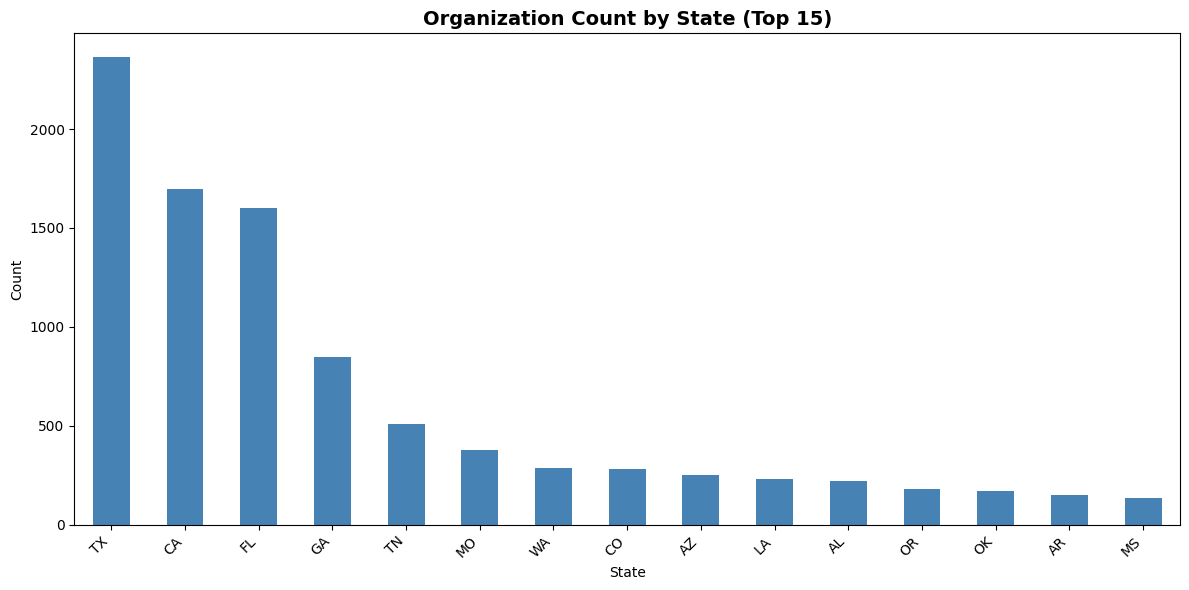

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Bar: org count by state (top 15)
if "STATE" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    state_counts = df["STATE"].value_counts().head(15)
    state_counts.plot(kind="bar", ax=ax, color="steelblue")
    ax.set_title("Organization Count by State (Top 15)", fontsize=14, fontweight="bold")
    ax.set_xlabel("State")
    ax.set_ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("STATE column not found.")

**Plot explanation — Organization Count by State (Top 15)**

- What it shows: counts of organizations by U.S. state (top 15). The bars indicate where organizations are concentrated.
- What it means: geographic concentration suggests sampling and operational bias toward a few states; analyses using location should account for uneven representation (weighting or stratification).
- Actionable note: consider geocoding, normalizing by state population, or filtering to regions of interest.

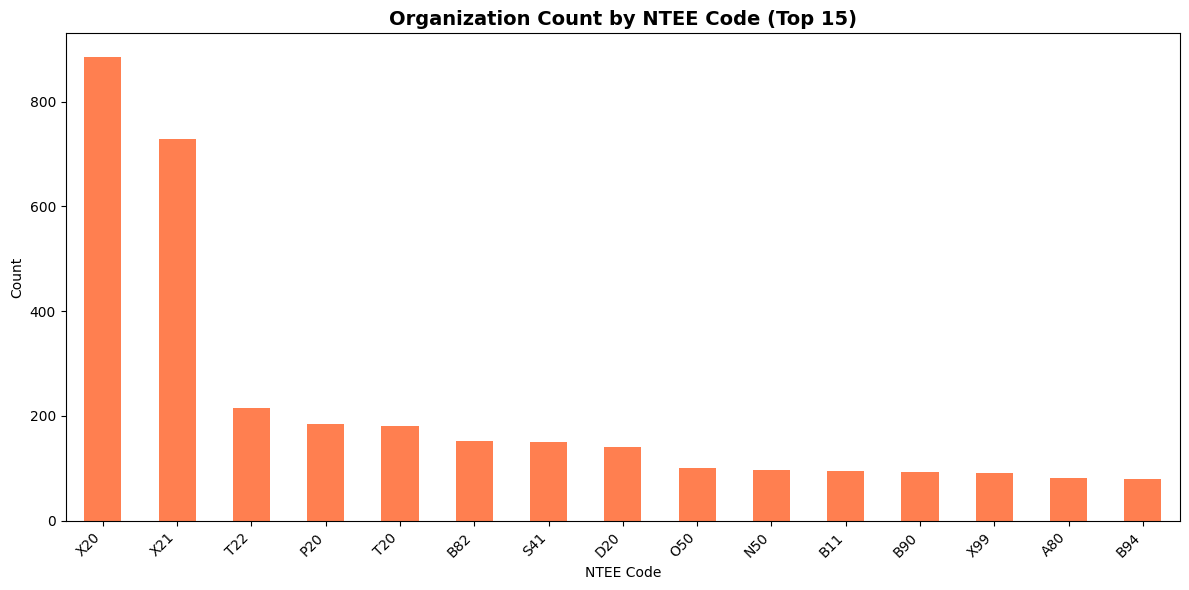

In [24]:
# 2) Bar: org count by NTEE (top 15)
if "NTEE_CD" in df.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    ntee_counts = df["NTEE_CD"].value_counts().head(15)
    ntee_counts.plot(kind="bar", ax=ax, color="coral")
    ax.set_title("Organization Count by NTEE Code (Top 15)", fontsize=14, fontweight="bold")
    ax.set_xlabel("NTEE Code")
    ax.set_ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("NTEE_CD column not found.")

**Plot explanation — Organization Count by NTEE Code (Top 15)**

- What it shows: distribution of organizations across the most frequent NTEE codes.
- What it means: a few NTEE codes dominate while many organizations have missing or rare codes; this affects category-based analyses and model features.
- Actionable note: impute or map missing/rare NTEE codes to broader categories to reduce sparsity.

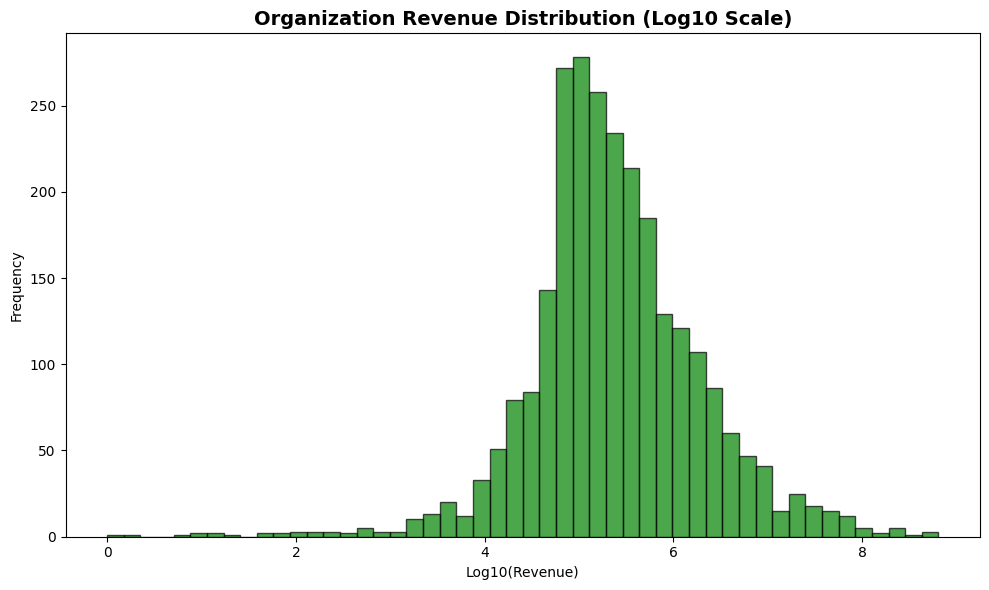

In [25]:
# 3) Histogram: revenue (log scale)
if "REVENUE_AMT" in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    revenue_vals = pd.to_numeric(df["REVENUE_AMT"], errors="coerce").dropna()
    revenue_vals = revenue_vals[revenue_vals > 0]  # only positive values for log scale
    ax.hist(np.log10(revenue_vals), bins=50, color="green", alpha=0.7, edgecolor="black")
    ax.set_title("Organization Revenue Distribution (Log10 Scale)", fontsize=14, fontweight="bold")
    ax.set_xlabel("Log10(Revenue)")
    ax.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("REVENUE_AMT column not found.")

**Plot explanation — Organization Revenue Distribution (Log10 Scale)**

- What it shows: histogram of positive revenue values on a log10 scale, revealing the distribution across orders of magnitude.
- What it means: revenue is highly right-skewed — many small organizations and a few very large ones; log scale makes multiplicative differences visible.
- Actionable note: use log-transform or robust statistics for modeling and visualization; treat extreme high-revenue outliers separately.

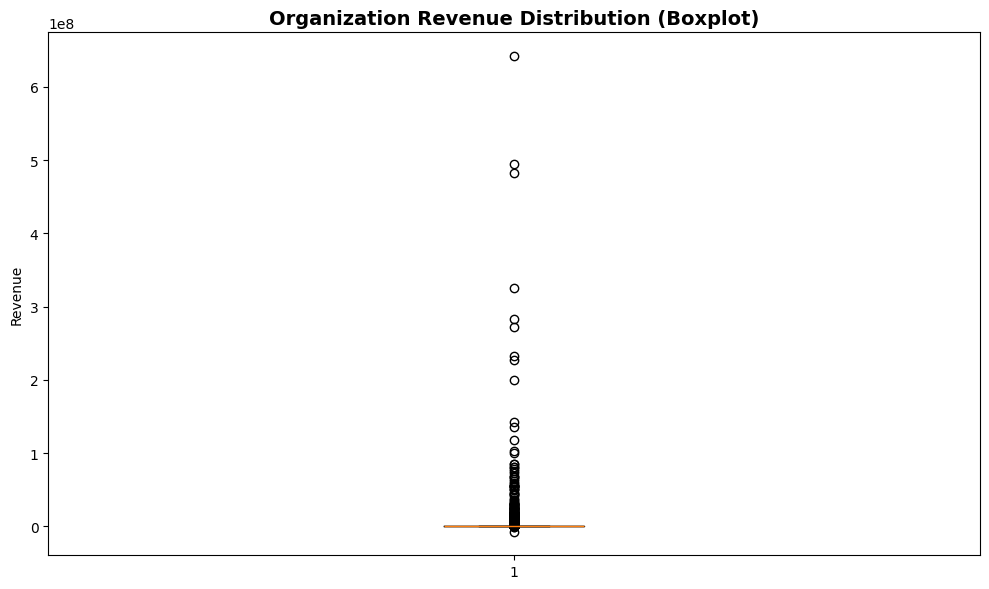

In [26]:
# 4) Boxplot: revenue
if "REVENUE_AMT" in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    revenue_vals = pd.to_numeric(df["REVENUE_AMT"], errors="coerce").dropna()
    ax.boxplot(revenue_vals, vert=True)
    ax.set_title("Organization Revenue Distribution (Boxplot)", fontsize=14, fontweight="bold")
    ax.set_ylabel("Revenue")
    plt.tight_layout()
    plt.show()
else:
    print("REVENUE_AMT column not found.")

**Plot explanation — Organization Revenue Distribution (Boxplot)**

- What it shows: boxplot of revenue values, highlighting median, IQR and extreme outliers.
- What it means: the median is much lower than the mean and there are extreme high-value outliers; central tendency is better described by median.
- Actionable note: prefer median/IQR and consider capping or separate modeling for outliers.

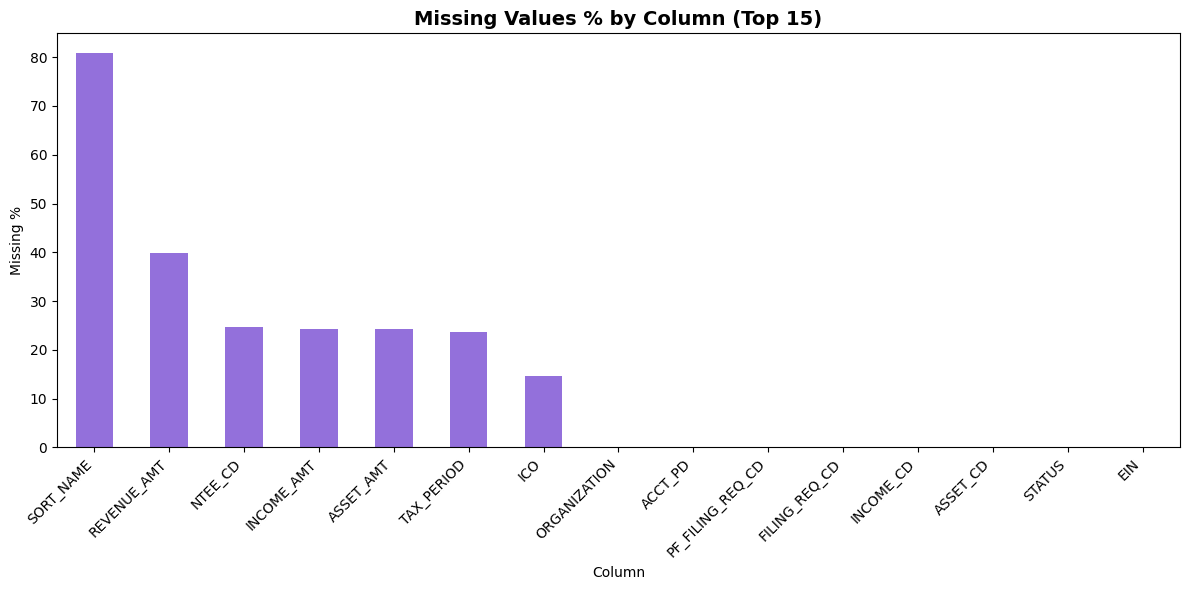

In [27]:
# 5) Bar: missing % by column (top 15)
fig, ax = plt.subplots(figsize=(12, 6))
missing_pct_sorted = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(15)
missing_pct_sorted.plot(kind="bar", ax=ax, color="mediumpurple")
ax.set_title("Missing Values % by Column (Top 15)", fontsize=14, fontweight="bold")
ax.set_xlabel("Column")
ax.set_ylabel("Missing %")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Plot explanation — Missing Values % by Column (Top 15)**

- What it shows: percentage of missing values for the top 15 columns with the highest missingness.
- What it means: some key categorical fields (e.g., `NTEE_CD`) have large missing rates and must be addressed before modeling; columns with near-constant missingness may be dropped.
- Actionable note: prioritize imputation, flagging, or removal of high-missing columns and document downstream impact.